In [1]:
#importing all the modules I'll need for this task
import urllib
import numpy as np
%matplotlib inline
from io import StringIO
import urllib.request
from urllib import request
import matplotlib
from io import StringIO
from datetime import datetime, timedelta
from pytz import timezone
matplotlib.rcParams['figure.figsize'] = [12.0, 9.0] #put as separate cell
import numpy as np
import pyart
from matplotlib import pyplot as plt
%matplotlib inline
import urllib.request 
import matplotlib.dates as mdates
import datetime as dt

C:\Users\Andrew\Anaconda3\lib\site-packages\pyart\map\grid_mapper.py:40: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  from .ball_tree import BallTree


In [2]:
#Downloading the data into python

import urllib.request
radar = urllib.request.Request('http://www.atmos.anl.gov/ANLMET/anltower.48')
data = urllib.request.urlopen(radar) 
my_data = np.recfromtxt(data, skip_header = 2)

In [3]:
print(my_data.shape)

(193, 25)


In [4]:
#printing out the min and max dewpoint
dewpoint = np.array(my_data[0:192, 9])
dewpoint = dewpoint.astype(np.float64)
dewpoint_max = np.amax(dewpoint)
dewpoint_min = np.amin(dewpoint)

In [5]:
#same as above, but with drybulb temperature
drybulb = np.array(my_data[0:192, 10])
drybulb = drybulb.astype(np.float64)
drybulb_max = np.amax(drybulb)
drybulb_min = np.amin(drybulb)

In [6]:
print(dewpoint_max)

18.9


In [7]:
print(dewpoint_min)

2.69


In [8]:
print(drybulb_max)

30.23


In [9]:
print(drybulb_min)

15.2


In [10]:
#print the date and time in this and the next cell to convert JDA into a datetime object
date = my_data[0:192, 0]
date = date.astype(np.float64)
print(date)


[ 144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  145.  145.
  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.
  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.
  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.
  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.
  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.
  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.
  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.
  145.  145.  145.  145.  145.  145.  145.  145.  145.  145.  146.  146.
  146.  146.  146.  146.  146.  146.  146.  146.  146.  146.  146.  146.
  146.  146.  146.  146.  146.  146.  146.  146.  1

In [11]:
time = (my_data[0:192, 1])
print(time)

[b'12:30' b'12:45' b'13:00' b'13:15' b'13:30' b'13:45' b'14:00' b'14:15'
 b'14:30' b'14:45' b'15:00' b'15:15' b'15:30' b'15:45' b'16:00' b'16:15'
 b'16:30' b'16:45' b'17:00' b'17:15' b'17:30' b'17:45' b'18:00' b'18:15'
 b'18:30' b'18:45' b'19:00' b'19:15' b'19:30' b'19:45' b'20:00' b'20:15'
 b'20:30' b'20:45' b'21:00' b'21:15' b'21:30' b'21:45' b'22:00' b'22:15'
 b'22:30' b'22:45' b'23:00' b'23:15' b'23:30' b'23:45' b'00:00' b'00:15'
 b'00:30' b'00:45' b'01:00' b'01:15' b'01:30' b'01:45' b'02:00' b'02:15'
 b'02:30' b'02:45' b'03:00' b'03:15' b'03:30' b'03:45' b'04:00' b'04:15'
 b'04:30' b'04:45' b'05:00' b'05:15' b'05:30' b'05:45' b'06:00' b'06:15'
 b'06:30' b'06:45' b'07:00' b'07:15' b'07:30' b'07:45' b'08:00' b'08:15'
 b'08:30' b'08:45' b'09:00' b'09:15' b'09:30' b'09:45' b'10:00' b'10:15'
 b'10:30' b'10:45' b'11:00' b'11:15' b'11:30' b'11:45' b'12:00' b'12:15'
 b'12:30' b'12:45' b'13:00' b'13:15' b'13:30' b'13:45' b'14:00' b'14:15'
 b'14:30' b'14:45' b'15:00' b'15:15' b'15:30' b'15:

In [12]:
#Printing dewpoint and drybulb data so I can plot the data
dewpoint = (my_data[0:192, 9])
dewpoint = dewpoint.astype(np.float64)
dewpoint_max = np.amax(dewpoint)
dewpoint_min = np.amin(dewpoint)
print(dewpoint)



[  5.54   5.7    5.41   4.93   5.41   4.97   5.17   5.22   5.07   4.79
   4.67   4.1    4.54   4.21   3.97   3.04   3.72   3.74   4.03   4.08
   3.67   3.52   2.82   3.31   3.77   3.31   3.1    3.12   3.41   3.45
   3.31   3.08   2.94   2.69   2.72   2.76   2.88   2.98   3.06   3.26
   3.54   3.76   3.96   4.22   4.44   4.74   5.04   5.46   5.74   6.06
   6.3    6.47   6.65   6.76   6.8    6.8    6.82   6.84   6.79   6.82
   6.96   7.01   7.1    7.15   7.16   7.2    7.32   7.53   7.61   7.91
   8.33   8.74   9.18   9.82  10.29  10.62  11.07  11.36  11.45  11.61
  11.77  12.15  11.92  12.1   11.99  11.91  11.75  11.59  10.54   9.99
  10.07  10.39  10.21   9.81   9.74   9.84   9.98   9.4    9.7    9.44
   8.82   8.86   8.27   8.69   8.45   8.33   8.54   8.71   8.42   8.3
   7.68   7.43   7.8    8.28   8.37   9.68   9.99  10.29  11.02  10.69
  10.75  10.61  10.75  11.13  11.34  11.57  11.87  12.14  12.54  12.84
  13.05  13.22  13.35  13.48  13.57  13.67  13.76  13.85  14.11  14.42
  14.81

In [13]:
drybulb = (my_data[0:192, 10])
drybulb = drybulb.astype(np.float64)
drybulb_max = np.amax(drybulb)
drybulb_min = np.amin(drybulb)
print(drybulb)


[ 25.66  25.85  25.97  26.11  26.41  26.52  26.77  26.95  27.2   27.21
  27.31  27.38  27.62  27.77  27.83  27.76  27.79  27.89  27.83  27.58
  27.4   27.01  26.61  26.02  25.37  24.93  24.52  23.89  23.21  22.82
  22.42  22.12  21.86  21.63  21.3   20.99  20.79  20.68  20.63  20.61
  20.45  20.36  20.11  19.79  19.53  19.22  19.13  18.79  18.47  18.26
  18.18  18.12  18.04  17.89  17.89  17.94  17.84  17.67  17.46  17.19
  16.87  16.51  16.29  16.05  15.92  15.8   15.86  15.71  15.32  15.2
  15.66  16.43  17.25  18.28  19.09  19.88  20.72  21.45  22.02  22.65
  23.2   23.79  24.13  24.54  24.83  25.3   25.52  25.84  26.02  26.36
  26.7   27.12  27.26  27.37  27.57  27.76  28.13  28.39  28.4   28.42
  28.76  29.31  29.1   29.33  29.46  29.79  29.91  30.03  30.04  30.22
  30.23  30.2   30.12  30.08  29.88  29.66  29.32  28.86  28.32  27.94
  27.52  27.12  26.71  26.39  26.19  25.82  25.38  25.11  24.99  24.82
  24.55  24.29  23.98  23.73  23.55  23.17  22.96  22.62  22.4   22.24
  22.14

In [14]:
print('maximum dewpoint temperature = %f'%(dewpoint_max))
print('minimum dewpoint temperature = %f'%(dewpoint_min))
print('maximum drybulb temperature = %f'%(drybulb_max))
print('minimum dewpoint temperature = %f'%(dewpoint_min))

maximum dewpoint temperature = 18.900000
minimum dewpoint temperature = 2.690000
maximum drybulb temperature = 30.230000
minimum dewpoint temperature = 2.690000


In [15]:
combination = np.column_stack((date,time))
combination = np.array(combination)
combination

C:\Users\Andrew\Anaconda3\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Users\Andrew\Anaconda3\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


array([[b'144.0', b'12:30'],
       [b'144.0', b'12:45'],
       [b'144.0', b'13:00'],
       [b'144.0', b'13:15'],
       [b'144.0', b'13:30'],
       [b'144.0', b'13:45'],
       [b'144.0', b'14:00'],
       [b'144.0', b'14:15'],
       [b'144.0', b'14:30'],
       [b'144.0', b'14:45'],
       [b'144.0', b'15:00'],
       [b'144.0', b'15:15'],
       [b'144.0', b'15:30'],
       [b'144.0', b'15:45'],
       [b'144.0', b'16:00'],
       [b'144.0', b'16:15'],
       [b'144.0', b'16:30'],
       [b'144.0', b'16:45'],
       [b'144.0', b'17:00'],
       [b'144.0', b'17:15'],
       [b'144.0', b'17:30'],
       [b'144.0', b'17:45'],
       [b'144.0', b'18:00'],
       [b'144.0', b'18:15'],
       [b'144.0', b'18:30'],
       [b'144.0', b'18:45'],
       [b'144.0', b'19:00'],
       [b'144.0', b'19:15'],
       [b'144.0', b'19:30'],
       [b'144.0', b'19:45'],
       [b'144.0', b'20:00'],
       [b'144.0', b'20:15'],
       [b'144.0', b'20:30'],
       [b'144.0', b'20:45'],
       [b'144.

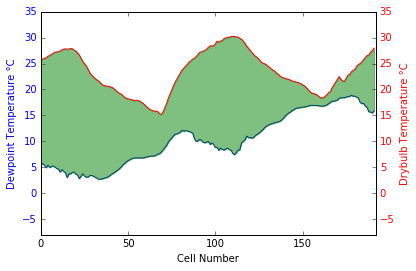

In [20]:
#plotting the drybulb and dewpoint and filling between the two with green 
fig, ax1 = plt.subplots()
y1 = dewpoint
ax1.plot(y1, 'b-')
ax1.set_xlabel('Cell Number')
ax1.set_ylabel('Dewpoint Temperature °C', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.ylim((-8,35))

ax2 = ax1.twinx()
y2 = drybulb
ax2.plot(y2, 'r-')
ax2.set_ylabel('Drybulb Temperature °C', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.ylim((-8,35))
plt.xlim((0,192))
x = np.arange(0, 192)
plt.fill_between(x, dewpoint, drybulb, color='green', alpha=0.5)
plt.show()

In [17]:
#here I'm combining the date and time together to get datetime objects 
combination = (combination)
base = datetime(2016, 1, 1, 0, 0, 0, 0)
transformed = [base + timedelta(days=int(float(x)), hours=int(y[0:2]), minutes=int(y[3:5])) for x, y in combination]
my_array = np.array(transformed)
my_array

array([datetime.datetime(2016, 5, 24, 12, 30),
       datetime.datetime(2016, 5, 24, 12, 45),
       datetime.datetime(2016, 5, 24, 13, 0),
       datetime.datetime(2016, 5, 24, 13, 15),
       datetime.datetime(2016, 5, 24, 13, 30),
       datetime.datetime(2016, 5, 24, 13, 45),
       datetime.datetime(2016, 5, 24, 14, 0),
       datetime.datetime(2016, 5, 24, 14, 15),
       datetime.datetime(2016, 5, 24, 14, 30),
       datetime.datetime(2016, 5, 24, 14, 45),
       datetime.datetime(2016, 5, 24, 15, 0),
       datetime.datetime(2016, 5, 24, 15, 15),
       datetime.datetime(2016, 5, 24, 15, 30),
       datetime.datetime(2016, 5, 24, 15, 45),
       datetime.datetime(2016, 5, 24, 16, 0),
       datetime.datetime(2016, 5, 24, 16, 15),
       datetime.datetime(2016, 5, 24, 16, 30),
       datetime.datetime(2016, 5, 24, 16, 45),
       datetime.datetime(2016, 5, 24, 17, 0),
       datetime.datetime(2016, 5, 24, 17, 15),
       datetime.datetime(2016, 5, 24, 17, 30),
       datetime.da

C:\Users\Andrew\Anaconda3\lib\site-packages\dateutil\rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\dateutil\rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\dateutil\rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\dateutil\rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise

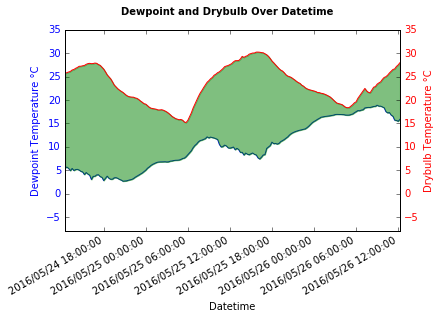

In [19]:
#here I'm ploting dewpoint and drybulb over datetime

fig, ax1 = plt.subplots()
fig.suptitle('Dewpoint and Drybulb Over Datetime', fontsize=10, fontweight='bold')
x = np.array(my_array)
y1 = dewpoint
y2 = drybulb
ax1.set_xlabel('Datetime')
ax1.plot(x, y1, 'b-')
ax1.set_ylabel('Dewpoint Temperature °C', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.ylim((-8,35))

ax2 = ax1.twinx()

ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Drybulb Temperature °C', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.ylim((-8,35))


x_lims = (my_array)

#converting datetime objects to correct format for matplotlib 
date_format = mdates.DateFormatter('%Y/%m/%d %H:%M:%S')
x_lims = mdates.date2num(x_lims)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(date_format)

#next line of code will help the data fit better
fig.autofmt_xdate()                       

plt.fill_between(x, y1, y2, color='green', alpha='0.5')

plt.show()
